<a href="https://colab.research.google.com/github/saimasharleen/A-Visual-Search-Engine-for-Image-Retrieval-using-Feature-Distance-Metrics/blob/main/ResNet50V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#connecting Google Drive with Colab
from google.colab import drive
import zipfile
drive.mount("/content/gdrive")

Mounted at /content/gdrive


94668760/94668760 [==============================] - 3s 0us/step
Found 3578 images belonging to 149 classes.
56/56 [==============================] - 2914s 53s/step
Num images =  3578
Shape of feature_list =  (3578, 2048)
1/1 [==============================] - 0s 184ms/step


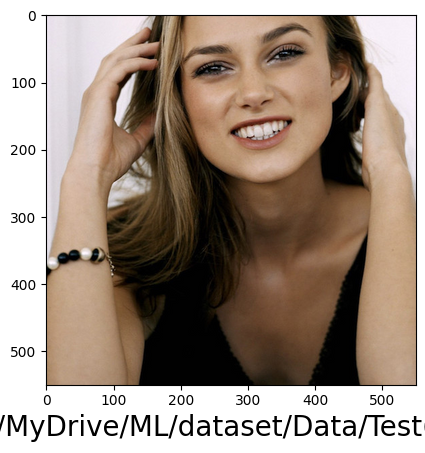

********* Predictions ***********


NameError: ignored

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from sklearn.neighbors import NearestNeighbors

# Set up the ResNet50V2 model
img_size = 224
model = ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3), pooling='max')

# Set the data path and batch size
data_path = "/content/gdrive/MyDrive/ML/dataset/Data/training"
batch_size = 64

# Set up the image generator
img_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load the images from the directory
datagen = img_gen.flow_from_directory(
    data_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode=None,
    shuffle=False
)

# Get the number of images and epochs
num_images = len(datagen.filenames)
num_epochs = int(np.ceil(num_images / batch_size))

# Extract features using the ResNet50V2 model
feature_list = model.predict(datagen, num_epochs, verbose=1)
print("Num images = ", len(datagen.classes))
print("Shape of feature_list = ", feature_list.shape)

# Get the full path for all the images in the dataset
filenames = [os.path.join(data_path, s) for s in datagen.filenames]

# Fit the Nearest Neighbors model
neighbors = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean')
neighbors.fit(feature_list)

# Load and preprocess the test image
img_path = '/content/gdrive/MyDrive/ML/dataset/Data/Test(1).jpg'
input_shape = (img_size, img_size, 3)
img = image.load_img(img_path, target_size=(input_shape[0], input_shape[1]))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
test_img_features = model.predict(preprocessed_img, batch_size=1)

# Find the nearest neighbors for the test image
_, indices = neighbors.kneighbors(test_img_features)

# Display the original test image and its similar images
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image', fontsize=20)
plt.show()

print('********* Predictions ***********')
similar_images(indices[0], _[0])

# Perform PCA on the feature list
pca = PCA(n_components=100)
pca.fit(feature_list)
compressed_features = pca.transform(feature_list)

# Fit the Nearest Neighbors model using PCA features
neighbors_pca_features = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean').fit(compressed_features)
test_img_compressed = pca.transform(test_img_features)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)

# Display the original test image and its similar images after PCA
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image', fontsize=20)
plt.show()

print('********* Predictions after PCA ***********')
similar_images(indices[0], distances[0])


In [4]:
def similar_images(indices, distances):
    # Display the similar images
    for i in range(len(indices)):
        img_path = filenames[indices[i]]
        img = mpimg.imread(img_path)
        plt.figure()
        plt.imshow(img)
        plt.xlabel(f"Similar Image {i+1}\nDistance: {distances[i]:.2f}", fontsize=12)
    plt.show()


********* Predictions ***********


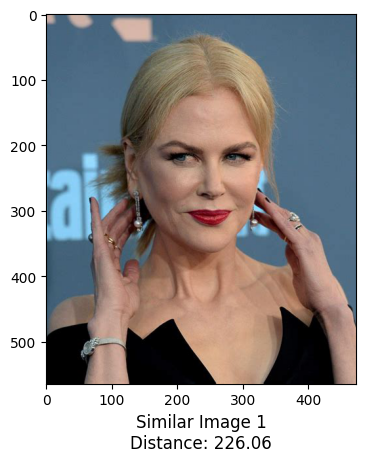

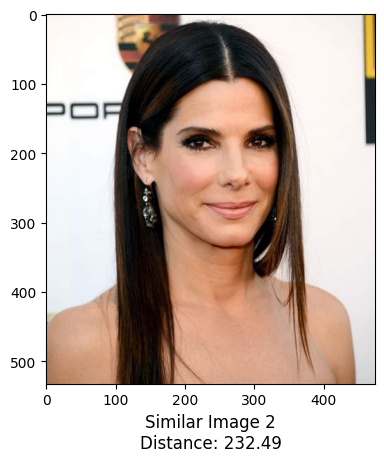

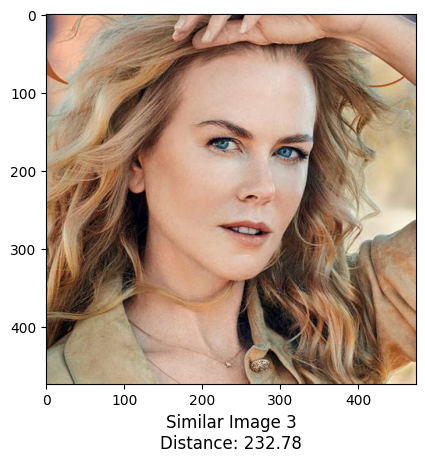

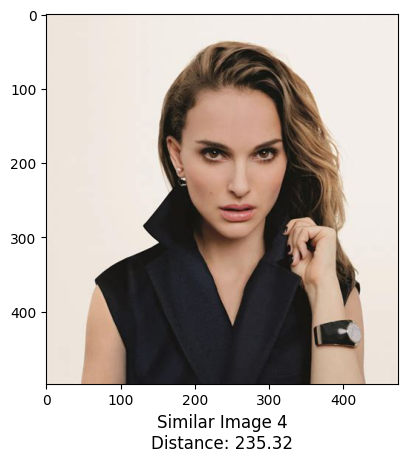

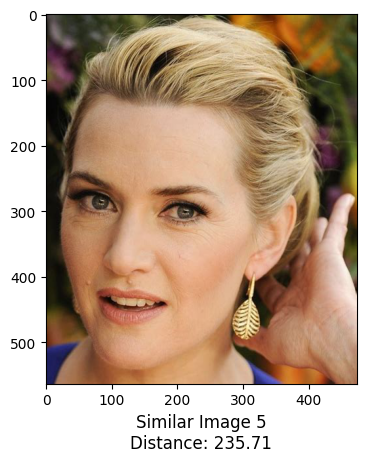

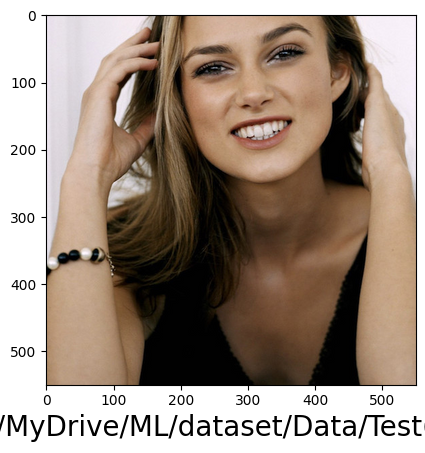

********* Predictions after PCA ***********


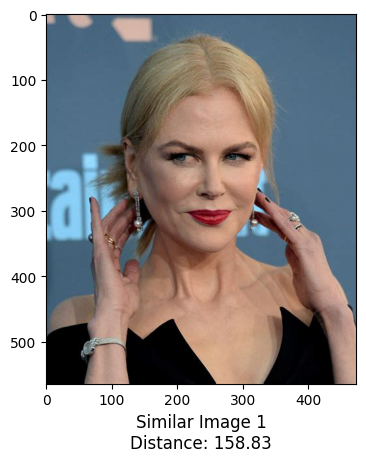

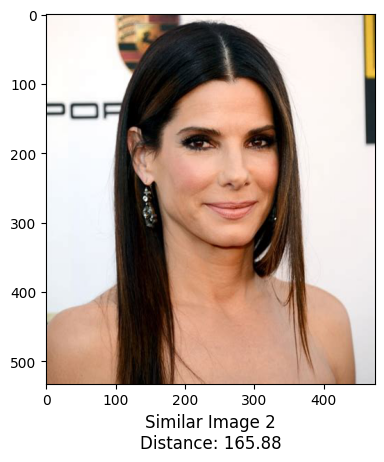

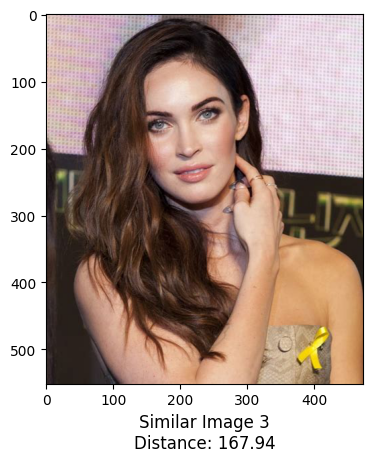

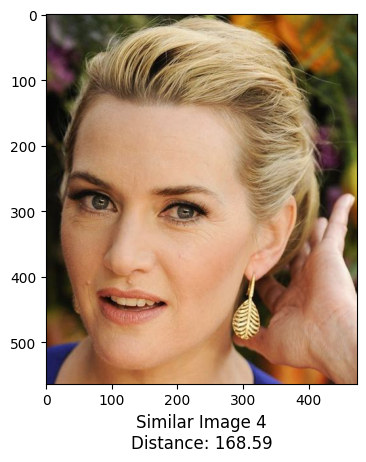

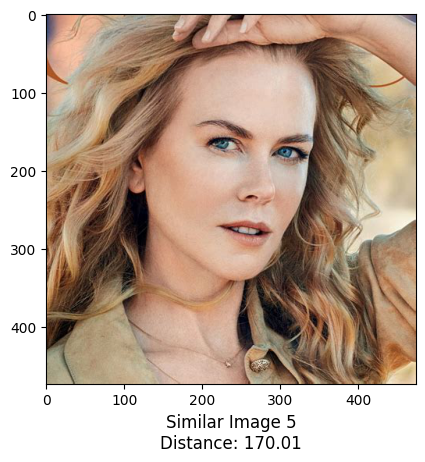

In [5]:
print('********* Predictions ***********')
similar_images(indices[0], _[0])

# Perform PCA on the feature list
pca = PCA(n_components=100)
pca.fit(feature_list)
compressed_features = pca.transform(feature_list)

# Fit the Nearest Neighbors model using PCA features
neighbors_pca_features = NearestNeighbors(n_neighbors=5, algorithm='ball_tree', metric='euclidean').fit(compressed_features)
test_img_compressed = pca.transform(test_img_features)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)

# Display the original test image and its similar images after PCA
plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
plt.xlabel(img_path.split('.')[0] + '_Original Image', fontsize=20)
plt.show()

print('********* Predictions after PCA ***********')
similar_images(indices[0], distances[0])

In [13]:
print("Dataset Filenames:", datagen.filenames)
print("Base Filename:", base_filename)


Dataset Filenames: ['Angelina Jolie/001_fe3347c0.jpg', 'Angelina Jolie/002_8f8da10e.jpg', 'Angelina Jolie/003_57612506.jpg', 'Angelina Jolie/004_f61e7d0c.jpg', 'Angelina Jolie/005_582c121a.jpg', 'Angelina Jolie/006_9135205d.jpg', 'Angelina Jolie/007_cabbfcbb.jpg', 'Angelina Jolie/008_d1f87068.jpg', 'Angelina Jolie/009_fb3e6174.jpg', 'Angelina Jolie/010_f99d79e3.jpg', 'Angelina Jolie/011_7344ca35.jpg', 'Angelina Jolie/012_cfcd4007.jpg', 'Angelina Jolie/013_95ecbd39.jpg', 'Angelina Jolie/014_0d29db88.jpg', 'Angelina Jolie/015_8bac79b5.jpg', 'Angelina Jolie/016_8945d6ca.jpg', 'Angelina Jolie/017_e28ea9d4.jpg', 'Angelina Jolie/018_fcafe1a8.jpg', 'Angelina Jolie/019_57ab290d.jpg', 'Angelina Jolie/020_4c4b655f.jpg', 'Angelina Jolie/021_6e419870.jpg', 'Angelina Jolie/022_b497b92e.jpg', 'Angelina Jolie/023_7781dd1c.jpg', 'Angelina Jolie/024_ca32be97.jpg', 'Angelina Jolie/025_41cee764.jpg', 'Angelina Jolie/026_2828fcaf.jpg', 'Angelina Jolie/027_58887f30.jpg', 'Angelina Jolie/028_6a0ff8de.jpg', 

In [29]:
# Fit the Nearest Neighbors model using PCA features
neighbors_pca_features = NearestNeighbors(n_neighbors=10, algorithm='ball_tree', metric='euclidean').fit(compressed_features)
test_img_compressed = pca.transform(test_img_features)
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)


In [30]:
# Get the ground truth label for the test image
test_label = 0 # Replace this with the actual label for your test image

# Get the predicted labels from nearest neighbors
predicted_labels = [datagen.classes[indices[0][i]] for i in range(len(indices[0]))]

# Calculate top-1 accuracy
top1_accuracy = int(test_label == predicted_labels[0])

# Calculate top-5 accuracy
top5_accuracy = int(test_label in predicted_labels[:5])

# Calculate top-10 accuracy
top10_accuracy = int(test_label in predicted_labels[:10])

# Print the accuracies
print("Top-1 Accuracy:", top1_accuracy)
print("Top-5 Accuracy:", top5_accuracy)
print("Top-10 Accuracy:", top10_accuracy)


Top-1 Accuracy: 0
Top-5 Accuracy: 0
Top-10 Accuracy: 0


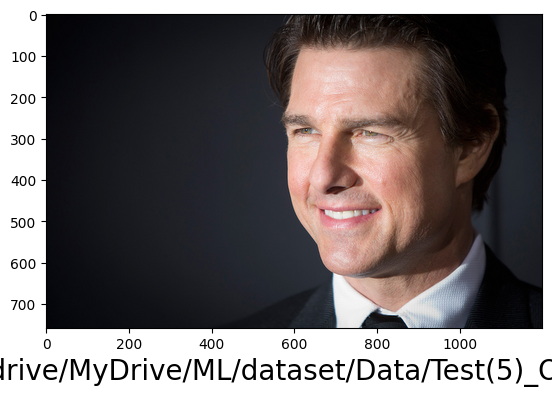

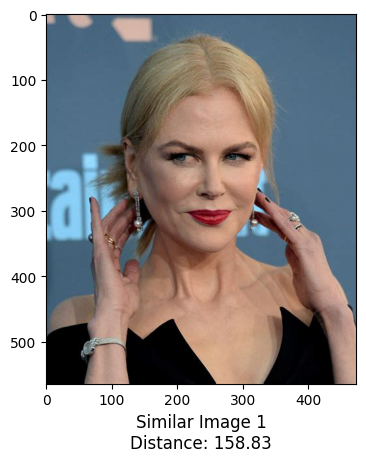

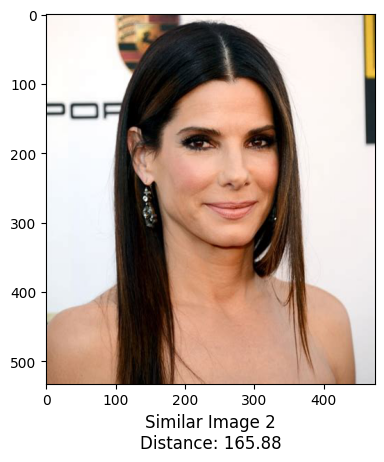

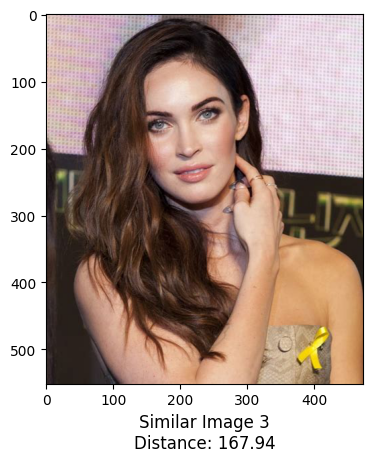

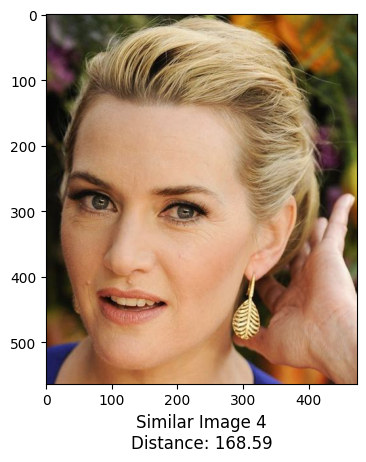

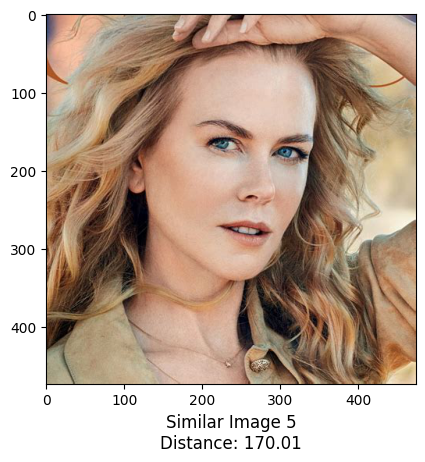

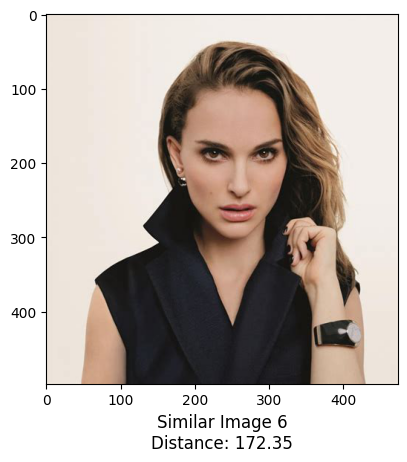

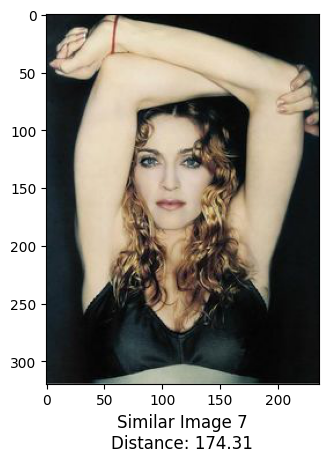

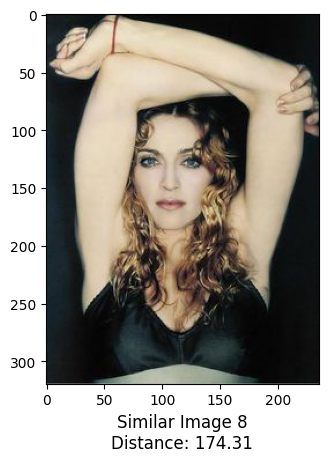

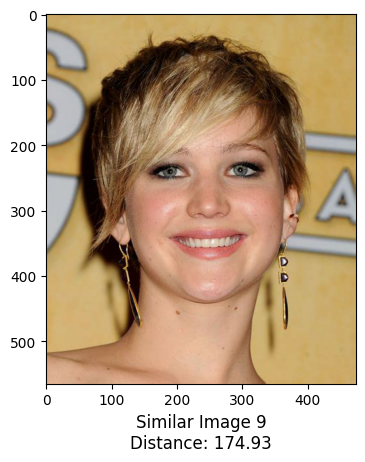

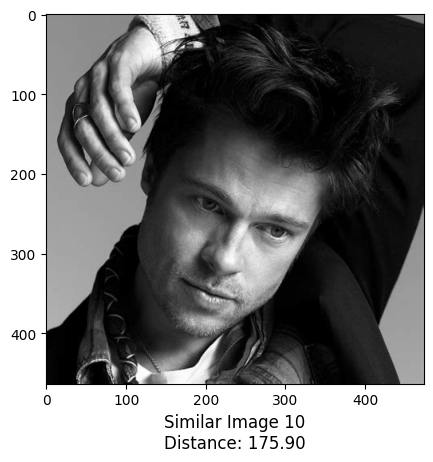

Top-1 Accuracy: 0
Top-5 Accuracy: 0
Top-10 Accuracy: 0


In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def plot_nearest_neighbors(img_path, indices, distances):
    # Display the original test image
    plt.imshow(mpimg.imread(img_path), interpolation='lanczos')
    plt.xlabel(img_path.split('.')[0] + '_Original Image', fontsize=20)
    plt.show()

    # Display the similar images
    for i in range(len(indices)):
        img_path = filenames[indices[i]]
        img = mpimg.imread(img_path)
        plt.figure()
        plt.imshow(img)
        plt.xlabel(f"Similar Image {i+1}\nDistance: {distances[i]:.2f}", fontsize=12)
    plt.show()

# Find the nearest neighbors for the test image
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)

# Plot the nearest neighbors
plot_nearest_neighbors(img_path, indices[0], distances[0])
# Find the nearest neighbors for the test image
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)

# Get the ground truth label for the test image
test_label = 0 # Replace this with the actual label for your test image

# Get the predicted labels from nearest neighbors
predicted_labels = [datagen.classes[indices[0][i]] for i in range(len(indices[0]))]

# Calculate top-1 accuracy
top1_accuracy = int(test_label == predicted_labels[0])

# Calculate top-5 accuracy
top5_accuracy = int(test_label in predicted_labels[:5])

# Calculate top-10 accuracy
top10_accuracy = int(test_label in predicted_labels[:10])

# Print the accuracies
print("Top-1 Accuracy:", top1_accuracy)
print("Top-5 Accuracy:", top5_accuracy)
print("Top-10 Accuracy:", top10_accuracy)


In [ ]:
# Set the path to the test image
img_path = '/content/gdrive/MyDrive/ML/dataset/Data/Test(5).jpg'

# Get the ground truth label for the test image
test_label = os.path.basename(os.path.dirname(img_path))

# Find the nearest neighbors for the test image
distances, indices = neighbors_pca_features.kneighbors(test_img_compressed)

# Get the predicted labels from nearest neighbors
predicted_labels = [datagen.classes[indices[0][i]] for i in range(len(indices[0]))]

# Calculate top-1 accuracy
top1_accuracy = int(test_label == predicted_labels[0])

# Calculate top-5 accuracy
top5_accuracy = int(test_label in predicted_labels[:5])

# Calculate top-10 accuracy
top10_accuracy = int(test_label in predicted_labels[:10])

# Print the accuracies
print("Top-1 Accuracy:", top1_accuracy)
print("Top-5 Accuracy:", top5_accuracy)
print("Top-10 Accuracy:", top10_accuracy)
